## Coding Exercise #0310

### 1. Classification with KNN:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### 1.1. Read in data:

The data and explanation can be found [here](https://www.kaggle.com/c/titanic/data) (requires sign in).

In [ ]:
# Go to the directory where the data file is located. 
# os.chdir(r'~~')                # Please, replace the path with your own.   

In [2]:
df = pd.read_csv('75._data_titanic.csv', header='infer')

In [3]:
df.shape

(891, 12)

In [4]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


#### 1.2. Missing value processing: 

In [5]:
# Check for the missing values.
df.isnull().sum(axis=0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill the missing values in the Age variable.
n = df.shape[0]
Age = []                                                               # A temporary list.
for i in range(n):
    if np.isnan(df.Age[i]):
        if ('Mr' in df.Name[i]) or ('Mrs' in df.Name[i]) :
            Age.append(30)                                             # If Mr. or Mrs. in the name, then fill with 30.
        else:
            Age.append(10)                                             # Likely a child. So, fill with 10.
    else:
        Age.append(df.Age[i])
df.Age = pd.Series(Age)

In [7]:
# We will drop some columns.
df = df.drop(columns = ['PassengerId','Name','Ticket','Fare','Cabin'])
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S


In [8]:
# Delete the rest of missing values.
df=df.dropna(axis=0)

In [9]:
df.shape

(889, 7)

#### 1.3. Exploratory data analysis:

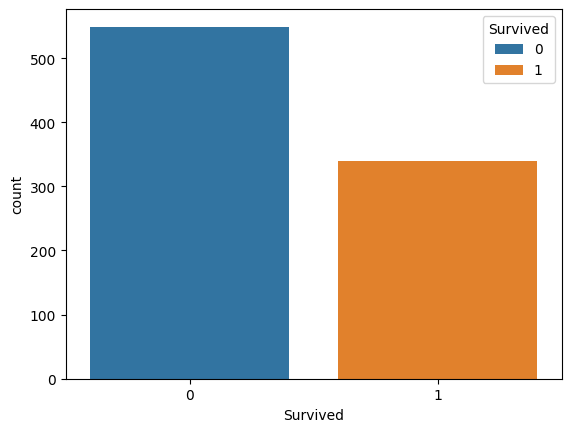

In [11]:
# The frequency table of Survived.
sns.countplot(x='Survived',data=df, hue='Survived')
plt.show()

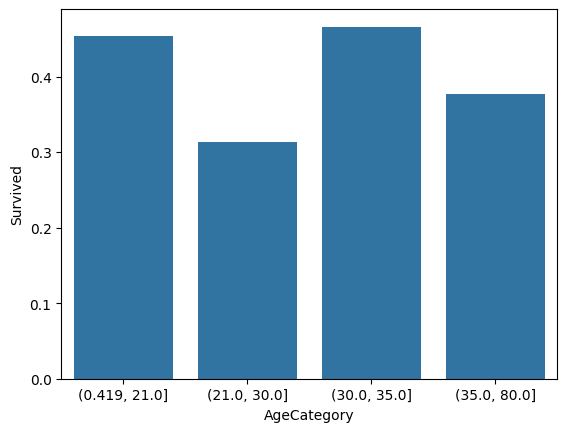

In [12]:
# Survival rate by Age category. 
df['AgeCategory'] = pd.qcut(df.Age,4)                   # Using quantiles cut into 4 intervals.
sns.barplot(x='AgeCategory',y='Survived', ci=None, data=df)
plt.show()

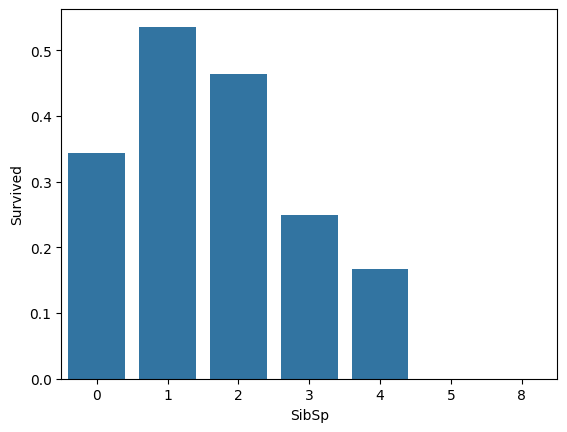

In [13]:
# Survival rate by SibSp category. 
sns.barplot(x='SibSp', y='Survived', ci=None, data=df)
plt.show()

In [ ]:
# Survival rate by Parch.
sns.barplot(x='Parch', y='Survived', ci=None, data=df)
plt.show()

In [ ]:
# Survival rate by Pclass.
sns.barplot(x='Pclass', y='Survived', ci=None, data=df)
plt.show()

In [ ]:
# Survival rate by Embarked.
sns.barplot(x='Embarked', y='Survived', ci=None, data=df)
plt.show()

In [ ]:
# Survival rate by Sex.
sns.barplot(x='Sex', y='Survived', ci=None,  data=df)
plt.show()

#### 1.4. Feature engineering:

In [ ]:
# Convert into dummy variables and then remove the original variables.
df = pd.get_dummies(df.AgeCategory, drop_first=True,prefix='Age').join(df.drop(columns=['Age','AgeCategory']))
df = pd.get_dummies(df.Pclass, drop_first=True,prefix='Pclass').join(df.drop(columns=['Pclass']))
df = pd.get_dummies(df.SibSp, drop_first=True,prefix='SibSp').join(df.drop(columns=['SibSp']))
df = pd.get_dummies(df.Parch, drop_first=True,prefix='Parch').join(df.drop(columns=['Parch']))
df = pd.get_dummies(df.Sex, drop_first=True,prefix='Sex').join(df.drop(columns=['Sex']))
df = pd.get_dummies(df.Embarked, drop_first=True,prefix='Embarked').join(df.drop(columns=['Embarked']))
df.head(5)

In [ ]:
# Save to an external file.
# df.to_csv('data_titanic_2.csv',index=False)

#### 1.5. KNN train and test:

In [ ]:
X = df.drop(columns=['Survived'])
Y = df.Survived

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
# Q: Instantiate, fit and predict a KNN with n_neighbours = 5 (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
knn5 = ??
knn5.??
Y_pred = ??
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")

#Q: Print the accuracy_score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
print( "Accuracy : " + str(??)

In [ ]:
# Instantiate, fit and predict a KNN with n_neighbours = 100
knn100 = ??
knn100.??
Y_pred = ??
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")

#Q: Print the accuracy_score (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
print( "Accuracy : " + str(??)

#### 1.6. KNN bias-Variance tradeoff as function of *k*: 

In [ ]:
# Instantiate, fit and predict aKNN with n_neighbours = k

accs = []
k_grid = range(1,100,1)
for k in k_grid:
    knn = ??
    knn.??
    Y_pred = ??
    accs.append(metrics.accuracy_score(Y_test,Y_pred))

In [ ]:
# Visualize.
plt.scatter(k_grid,accs,c='red',marker='o',s=10,alpha=0.6)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k')
plt.show()

#### 1.7. KNN hyperparameter optimization:

In [ ]:
# Q: Generate a parameter gri for k in [1,51] (https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
k_grid = ??
parameters = {'n_neighbors':k_grid}

In [ ]:
# Optimize the k (Grid  Search  CV  with KNeighborsClassifier as estimator, parameters, cv = 10 and n_jobs = -1 for using all the CPU cores)
gridCV = ??
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("Best k : " + str(best_k))

In [ ]:
# Q: Instantiate, test and predict with the best k.
KNN_best = ??
KNN_best.??
Y_pred = ??
print( "Best Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))